In [1]:
import pandas as pd
import seaborn as sns

In [3]:
#load data
tips=sns.load_dataset('tips')

In [4]:
#a look at the first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#data types in the dataset
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
#statistical summaries
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
#how many weekdays are present in the day column of the dataset?
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [10]:
#the number of times each of the days occur in the dataset
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
#the number of unique values for the time column of the dataset
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

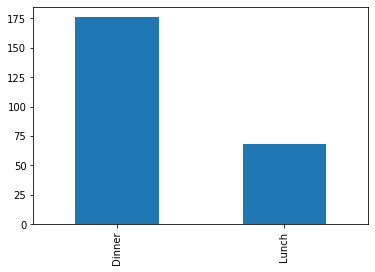

In [13]:
#visualizing the number of unique values for the time column of the dataset
tips.time.value_counts().plot(kind='bar')

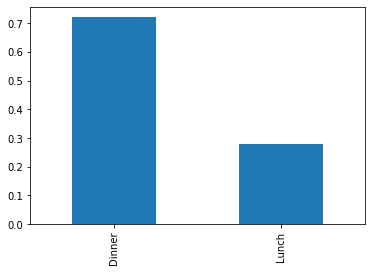

In [15]:
#display the counts in percentages:
tips.time.value_counts(normalize=True).plot.bar()

In [16]:
#of the two times(dinner and lunch), when do people tip more?
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

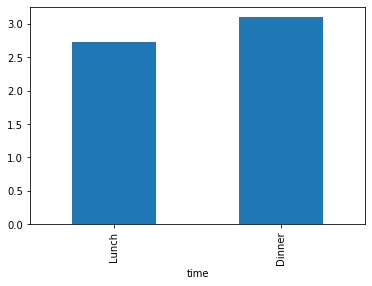

In [17]:
#creating a plot of the above:
tips.groupby(['time'])['tip'].mean().plot.bar()

In [18]:
#creating a cross table for smokers and tips
tips.groupby(['sex','smoker'])['tip'].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [20]:
#above table can be modified to:
tips.groupby(['sex','smoker'])['tip'].mean().unstack()

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [23]:
#add a new column to represent the percentage of the total bill that is tipped
tips['percentage_tip']=tips.tip/tips.total_bill*100

tips

,total_bill,tip,sex,smoker,day,time,size,percentage_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


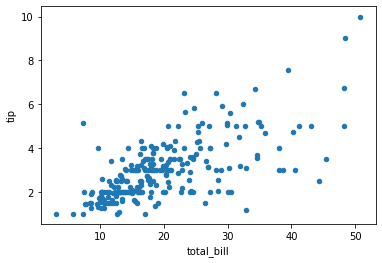

In [24]:
#plot of relationship between total bill and tip

tips.plot.scatter('total_bill','tip')

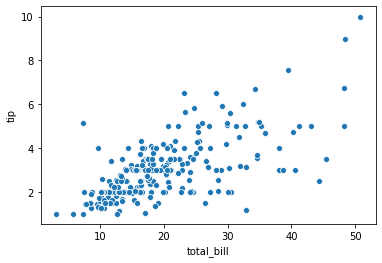

In [25]:
#using seaborn to plot the above:
sns.scatterplot('total_bill','tip',data=tips)

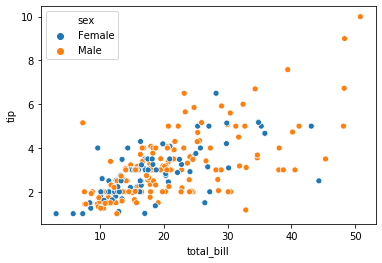

In [29]:
#add hue to the above plot
sns.scatterplot('total_bill','tip',hue='sex',data=tips)

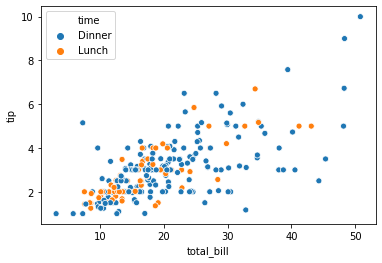

In [30]:
#time
sns.scatterplot('total_bill','tip',hue='time',data=tips)

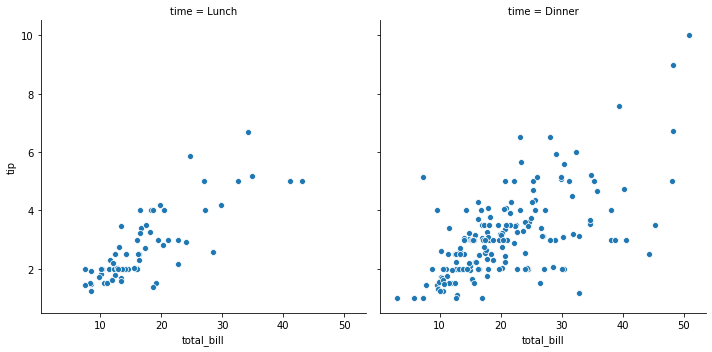

In [31]:
#split plot 
sns.relplot('total_bill','tip',data=tips,col='time')

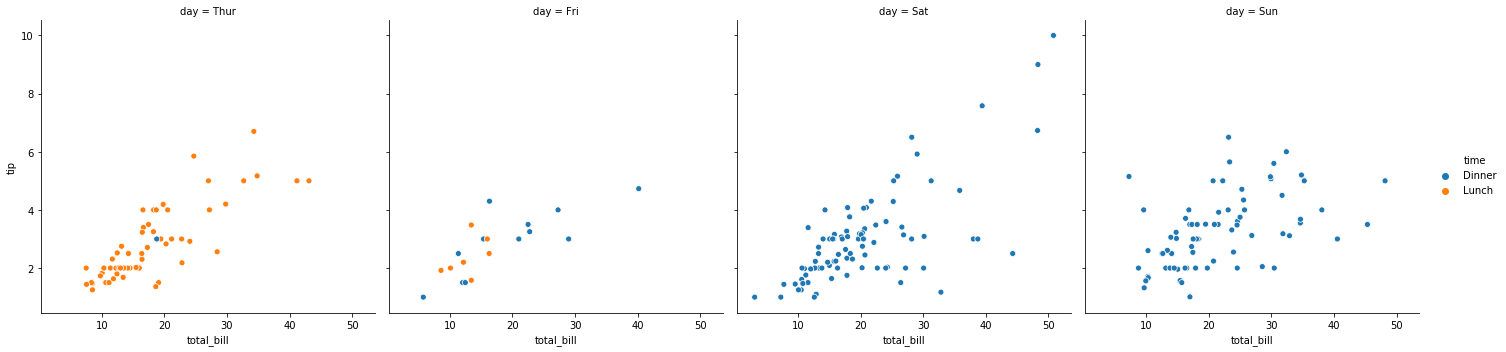

In [35]:
sns.relplot('total_bill','tip',data=tips,col='day',hue='time')